# Classification des chiffres EMNIST

In [1]:
#import librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE


import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model

from tensorflow.keras import layers,callbacks
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense, Activation, Flatten

from tensorflow.keras.applications.vgg16 import VGG16 

from tensorflow import keras
from tensorflow.keras import layers

import cv2
from tensorflow.keras.layers import Conv2D

In [17]:
#Récuperation du dataframe train 
df_raw = pd.read_csv("C:/Users/User/Desktop/Demo_CNN/train.csv")
df_raw

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
#Récuperation du dataframe test
X_demo = pd.read_csv("C:/Users/User/Desktop/Demo_CNN/test.csv")
X_demo

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
df_raw["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

# 1ère itération  

In [125]:
# df itération 1
df = df_raw.copy()

In [126]:
#On définit les features et la Target
X = df.drop(['label'], axis = 1)
y = df['label']

In [127]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

In [90]:
input_shape = [X.shape[1]]
input_shape

[784]

In [26]:
#Model 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=input_shape), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [27]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#Entrainer le model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
)

Epoch 1/50
735/735 [==============================] - 4s 4ms/step - loss: 4.7360 - accuracy: 0.8404 - val_loss: 1.0218 - val_accuracy: 0.8588
Epoch 2/50
735/735 [==============================] - 2s 3ms/step - loss: 0.6235 - accuracy: 0.8958 - val_loss: 0.7128 - val_accuracy: 0.8901
Epoch 3/50
735/735 [==============================] - 2s 3ms/step - loss: 0.4070 - accuracy: 0.9128 - val_loss: 0.6058 - val_accuracy: 0.8991
Epoch 4/50
735/735 [==============================] - 2s 3ms/step - loss: 0.3205 - accuracy: 0.9261 - val_loss: 0.5234 - val_accuracy: 0.9105
Epoch 5/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2779 - accuracy: 0.9335 - val_loss: 0.5219 - val_accuracy: 0.9129
Epoch 6/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2615 - accuracy: 0.9371 - val_loss: 0.5250 - val_accuracy: 0.9221
Epoch 7/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2452 - accuracy: 0.9390 - val_loss: 0.4616 - val_accuracy: 0.9247
Epoch 

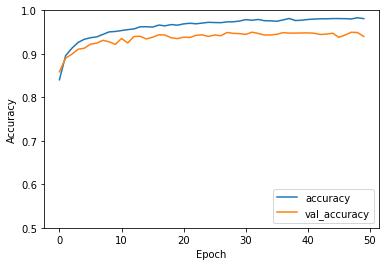

In [29]:
# history Accuracy 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

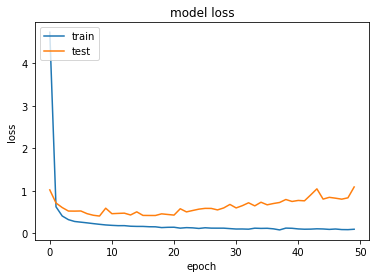

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# On remarque que vers 20 epoch, le model commence a overfitter, donc on va utiliser un early stopping 

## Avec Early Stopping 

In [31]:
#Model 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=input_shape), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [33]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [35]:
#Entrainer le model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
735/735 [==============================] - 3s 4ms/step - loss: 4.6493 - accuracy: 0.8308 - val_loss: 1.0042 - val_accuracy: 0.8442
Epoch 2/50
735/735 [==============================] - 3s 3ms/step - loss: 0.5903 - accuracy: 0.8844 - val_loss: 0.6424 - val_accuracy: 0.8833
Epoch 3/50
735/735 [==============================] - 2s 3ms/step - loss: 0.3954 - accuracy: 0.9115 - val_loss: 0.5091 - val_accuracy: 0.8930
Epoch 4/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2784 - accuracy: 0.9293 - val_loss: 0.4814 - val_accuracy: 0.9218
Epoch 5/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2633 - accuracy: 0.9351 - val_loss: 0.4439 - val_accuracy: 0.9206
Epoch 6/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2396 - accuracy: 0.9386 - val_loss: 0.3761 - val_accuracy: 0.9284
Epoch 7/50
735/735 [==============================] - 2s 3ms/step - loss: 0.2240 - accuracy: 0.9461 - val_loss: 0.3935 - val_accuracy: 0.9293
Epoch 

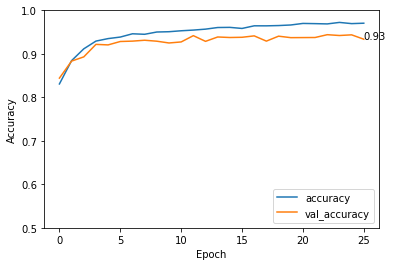

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.text(early_stopping.stopped_epoch, history.history['val_accuracy'][-1], str(round(history.history['val_accuracy'][-1],2)))
plt.show()

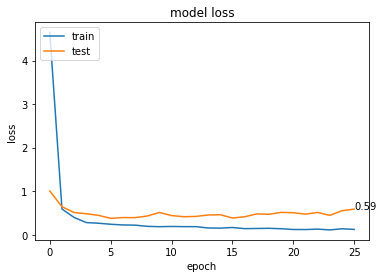

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(early_stopping.stopped_epoch, history.history['val_loss'][-1], str(round(history.history['val_loss'][-1],2)))
plt.show()

In [ ]:
#Classification report 

In [46]:
# On prédit les résultats
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

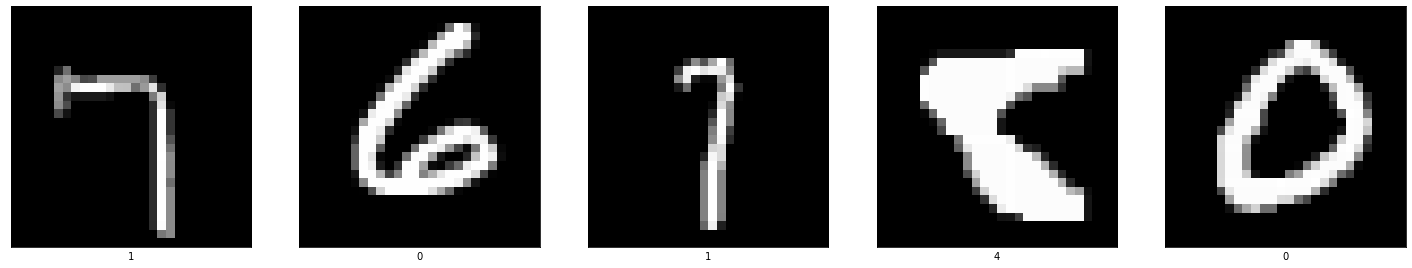

In [49]:
#Plotter les images et predictions de notre modèle sur X_test :

plt.figure(figsize=(25,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(X_test.values[i], (28, 28)), cmap='gray')
    plt.xlabel(str(y.values[i]))
plt.show();

# 2ème itération Reshape et Scaling

In [169]:
df = df_raw.copy()

In [170]:
y1 = np.array(df.iloc[:,0].values)
x1 = np.array(df.iloc[:,1:].values)

In [171]:
x1 = x1/255
#Reshape
nb_image = x1.shape[0]
h = 28
L = 28
train_image = h*L
x1 = x1.reshape(nb_image, L, h, 1)
#adding categorical 
y1 = tf.keras.utils.to_categorical(y1, 10)

In [172]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=.3, random_state=1, stratify=y)

In [173]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [174]:
print(X_train.shape)
print(y_train.shape)

(29400, 28, 28, 1)
(29400, 10)


In [175]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [184]:
#Model 
model = tf.keras.models.Sequential([Conv2D(64,(3,3), input_shape=input_shape),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [185]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [187]:
#Entrainer le model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
735/735 [==============================] - 38s 51ms/step - loss: 0.2823 - accuracy: 0.9138 - val_loss: 0.1734 - val_accuracy: 0.9454
Epoch 2/10
735/735 [==============================] - 36s 49ms/step - loss: 0.1225 - accuracy: 0.9621 - val_loss: 0.1527 - val_accuracy: 0.9553
Epoch 3/10
735/735 [==============================] - 36s 49ms/step - loss: 0.0778 - accuracy: 0.9750 - val_loss: 0.1710 - val_accuracy: 0.9503
Epoch 4/10
735/735 [==============================] - 35s 48ms/step - loss: 0.0556 - accuracy: 0.9813 - val_loss: 0.1549 - val_accuracy: 0.9594
Epoch 5/10
735/735 [==============================] - 36s 48ms/step - loss: 0.0402 - accuracy: 0.9864 - val_loss: 0.1669 - val_accuracy: 0.9590
Epoch 6/10
735/735 [==============================] - 35s 48ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.1794 - val_accuracy: 0.9594
Epoch 7/10
735/735 [==============================] - 35s 48ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.2219 - val_accuracy:

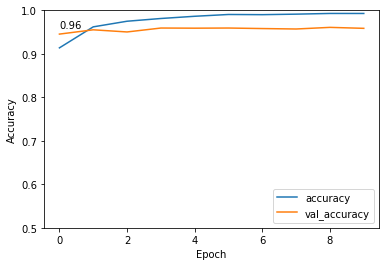

In [188]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.text(early_stopping.stopped_epoch, history.history['val_accuracy'][-1], str(round(history.history['val_accuracy'][-1],2)))
plt.show()

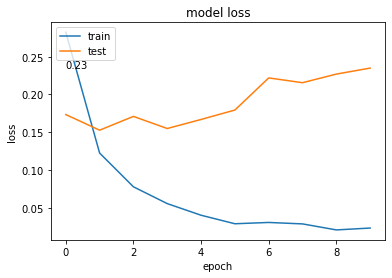

In [189]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(early_stopping.stopped_epoch, history.history['val_loss'][-1], str(round(history.history['val_loss'][-1],2)))
plt.show()

In [190]:
# On prédit les résultats
y_pred = model.predict(X_test)

In [191]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1240
           1       0.98      0.98      0.98      1405
           2       0.95      0.96      0.95      1253
           3       0.95      0.94      0.95      1305
           4       0.94      0.98      0.96      1222
           5       0.96      0.95      0.95      1139
           6       0.98      0.97      0.98      1241
           7       0.92      0.98      0.95      1320
           8       0.98      0.92      0.95      1219
           9       0.96      0.91      0.94      1256

   micro avg       0.96      0.96      0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600
 samples avg       0.96      0.96      0.96     12600



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3ème itération: amélioration du model et des couches 

In [243]:
# df itération 3
df = df_raw.copy()

#On définit les features et la Target
X = df.drop(['label'], axis = 1)
y = df['label']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

# Shape 
input_shape = [X.shape[1]]
input_shape

[784]

In [244]:
    model = Sequential()
    model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=10, activation='softmax'))

In [245]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [247]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [248]:
#Entrainer le model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
735/735 [==============================] - 75s 100ms/step - loss: 0.3667 - accuracy: 0.8860 - val_loss: 0.0815 - val_accuracy: 0.9769
Epoch 2/50
735/735 [==============================] - 76s 103ms/step - loss: 0.1324 - accuracy: 0.9622 - val_loss: 0.0800 - val_accuracy: 0.9781
Epoch 3/50
735/735 [==============================] - 78s 106ms/step - loss: 0.1059 - accuracy: 0.9684 - val_loss: 0.0706 - val_accuracy: 0.9789
Epoch 4/50
735/735 [==============================] - 80s 109ms/step - loss: 0.0831 - accuracy: 0.9747 - val_loss: 0.0594 - val_accuracy: 0.9840
Epoch 5/50
735/735 [==============================] - 72s 97ms/step - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.0723 - val_accuracy: 0.9816
Epoch 6/50
735/735 [==============================] - 73s 99ms/step - loss: 0.0753 - accuracy: 0.9782 - val_loss: 0.0524 - val_accuracy: 0.9866
Epoch 7/50
735/735 [==============================] - 78s 106ms/step - loss: 0.0655 - accuracy: 0.9804 - val_loss: 0.0507 - val_accu

In [249]:
# load model 
import pickle
import streamlit as st
model.save("model_final.h5")

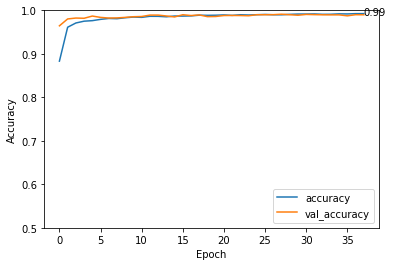

In [95]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.text(early_stopping.stopped_epoch, history.history['val_accuracy'][-1], str(round(history.history['val_accuracy'][-1],2)))
plt.show()

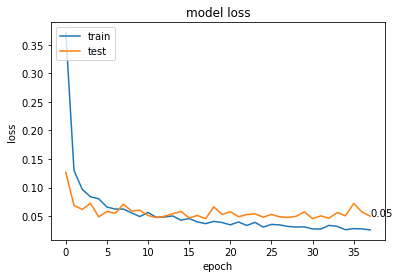

In [96]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(early_stopping.stopped_epoch, history.history['val_loss'][-1], str(round(history.history['val_loss'][-1],2)))
plt.show()

In [106]:
y_pred = model.predict(X_test)

In [135]:
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)
print(pred)
print(y_test)

[7 6 7 ... 9 6 1]
37627    7
3854     6
4086     7
7295     8
20108    0
        ..
34892    1
34340    1
15737    9
23341    6
35164    1
Name: label, Length: 12600, dtype: int64


In [129]:
X_tes = [np.reshape(a/255, (28, 28)) for a in X_test.values]

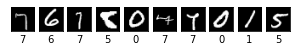

In [138]:
#X_tes = [np.reshape(a/255, (28, 28)) for a in X_test.values]

plt.figure(figsize=(5,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_tes[i], cmap='gray')
    plt.xlabel(str(f"{pred[i]}"))
plt.show();

In [139]:
# load model 
import pickle
import streamlit as st
model.save("modelD.h5")

# Transfert Learning

In [220]:
#df transfert learning 
df = df_raw.copy()

### Télécharger un model entrainé VGG16

In [221]:
IMG_SIZE = (32, 32, 3)

In [222]:
# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, input_shape = IMG_SIZE , weights='imagenet')
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [224]:
#Précisier que le model ne s'entraine pas 
pretrained_model.trainable = False

In [225]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

### Processing et changement de la shape en 32,32, 3

In [ ]:
# df = df_raw.copy()

# y1 = np.array(df.iloc[:,0].values)
# x1 = np.array(df.iloc[:,1:].values)

# x1 = x1/255
# #Reshape
# nb_image = x1.shape[0]
# h = 28
# L = 28
# train_image = h*L
# x1 = x1.reshape(nb_image, L, h, 1)
# #adding categorical 
# y1 = tf.keras.utils.to_categorical(y1, 10)

# # Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=.3, random_state=1, stratify=y)

# input_shape = X_train.shape[1:]
# input_shape

# print(X_train.shape)
# print(y_train.shape)

In [226]:
y1 = np.array(df.iloc[:,0].values)
x1 = np.array(df.iloc[:,1:].values)

x1 = x1/255

#Reshape
nb_image = x1.shape[0]
h = 28
L = 28
train_image = h*L
x1 = x1.reshape(nb_image, L, h, 1)

#adding categorical 
y1 = tf.keras.utils.to_categorical(y1, 10)

In [227]:
#Changement de shape channel 3 
original_x = tf.constant(x1)
converted_x = tf.image.grayscale_to_rgb(original_x)

In [228]:
#RGB
converted_x

<tf.Tensor: shape=(42000, 28, 28, 3), dtype=float64, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],




In [229]:
converted_x.shape

TensorShape([42000, 28, 28, 3])

In [230]:
#Conversion en numpy
converted_x_np = converted_x.numpy()

In [231]:
#Changement de dimension en 32, 32, 3

images = []

for i in range (len(converted_x_np)):
    im = converted_x_np[i]
    im = cv2.resize(im, dsize = (32, 32)) # resize image to match model 's expected sizing
    im = im.reshape(32, 32, 3) #
    images.append(im)
    

In [232]:
#vérification shape
images[3].shape

(32, 32, 3)

In [233]:
#conversion en numpy
images_np = np.array(images)
type(images_np)

numpy.ndarray

In [206]:
images_np.shape

(42000, 32, 32, 3)

In [234]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(images_np, y1, test_size=.3, random_state=1, stratify=y)

### Model combiné 

In [235]:
model = keras.Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(10, activation= tf.nn.softmax),
])

In [236]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [237]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [216]:
#Entrainer le model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
)

Epoch 1/50
735/735 [==============================] - 192s 260ms/step - loss: 1.8901 - accuracy: 0.2860 - val_loss: 1.5974 - val_accuracy: 0.4372
Epoch 2/50
735/735 [==============================] - 188s 256ms/step - loss: 1.4512 - accuracy: 0.5041 - val_loss: 1.3502 - val_accuracy: 0.5410
Epoch 3/50
735/735 [==============================] - 191s 260ms/step - loss: 1.2515 - accuracy: 0.5741 - val_loss: 1.1908 - val_accuracy: 0.5949
Epoch 4/50
735/735 [==============================] - 188s 256ms/step - loss: 1.1251 - accuracy: 0.6211 - val_loss: 1.0897 - val_accuracy: 0.6389
Epoch 5/50
735/735 [==============================] - 185s 252ms/step - loss: 1.0361 - accuracy: 0.6609 - val_loss: 1.0193 - val_accuracy: 0.6629
Epoch 6/50
735/735 [==============================] - 187s 255ms/step - loss: 0.9696 - accuracy: 0.6874 - val_loss: 0.9642 - val_accuracy: 0.6864
Epoch 7/50
735/735 [==============================] - 187s 255ms/step - loss: 0.9181 - accuracy: 0.7084 - val_loss: 0.9142 -

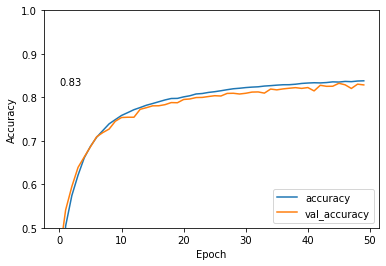

In [217]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.text(early_stopping.stopped_epoch, history.history['val_accuracy'][-1], str(round(history.history['val_accuracy'][-1],2)))
plt.show()

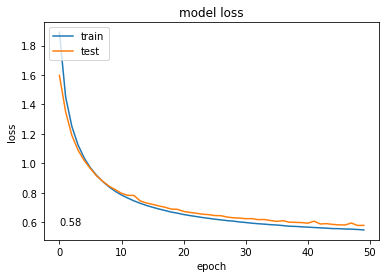

In [218]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(early_stopping.stopped_epoch, history.history['val_loss'][-1], str(round(history.history['val_loss'][-1],2)))
plt.show()

In [219]:
# load model 
import pickle
import streamlit as st
model.save("modelF.h5")

In [250]:
model.save('models/mode')

INFO:tensorflow:Assets written to: models/mode\assets


2021-12-09 14:29:45.423 INFO    tensorflow: Assets written to: models/mode\assets


In [165]:
# #Entrainer le model
# history = model.fit(
#     X_train, y_train,
#     validation_split=0.2,
#     batch_size=32,
#     epochs=10,
#     callbacks=[early_stopping]
# )

Epoch 1/10
735/735 [==============================] - 192s 260ms/step - loss: 1.3876 - accuracy: 0.5382 - val_loss: 0.9320 - val_accuracy: 0.6934
Epoch 2/10
735/735 [==============================] - 193s 263ms/step - loss: 0.7532 - accuracy: 0.7605 - val_loss: 0.6126 - val_accuracy: 0.8156
Epoch 3/10
735/735 [==============================] - 199s 270ms/step - loss: 0.5309 - accuracy: 0.8406 - val_loss: 0.4751 - val_accuracy: 0.8604
Epoch 4/10
735/735 [==============================] - 191s 260ms/step - loss: 0.4348 - accuracy: 0.8753 - val_loss: 0.4097 - val_accuracy: 0.8825
Epoch 5/10
735/735 [==============================] - 202s 275ms/step - loss: 0.3784 - accuracy: 0.8915 - val_loss: 0.3652 - val_accuracy: 0.8947
Epoch 6/10
735/735 [==============================] - 191s 260ms/step - loss: 0.3414 - accuracy: 0.9013 - val_loss: 0.3343 - val_accuracy: 0.9029
Epoch 7/10
735/735 [==============================] - 203s 276ms/step - loss: 0.3142 - accuracy: 0.9079 - val_loss: 0.3090 -

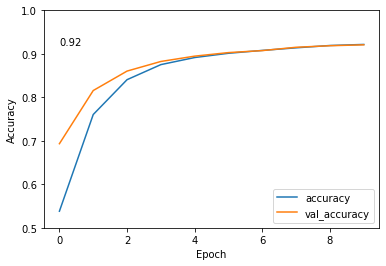

In [166]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.text(early_stopping.stopped_epoch, history.history['val_accuracy'][-1], str(round(history.history['val_accuracy'][-1],2)))
plt.show()

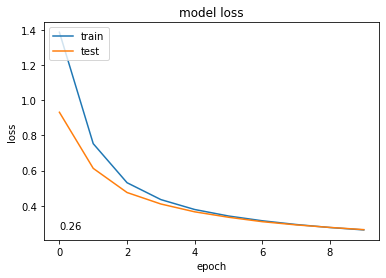

In [167]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(early_stopping.stopped_epoch, history.history['val_loss'][-1], str(round(history.history['val_loss'][-1],2)))
plt.show()

In [238]:
#Entrainer le model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=15,
    callbacks=[early_stopping]
)

Epoch 1/15
735/735 [==============================] - 190s 257ms/step - loss: 1.2858 - accuracy: 0.5897 - val_loss: 0.7898 - val_accuracy: 0.7622
Epoch 2/15
735/735 [==============================] - 193s 263ms/step - loss: 0.6353 - accuracy: 0.8139 - val_loss: 0.5558 - val_accuracy: 0.8374
Epoch 3/15
735/735 [==============================] - 189s 257ms/step - loss: 0.4845 - accuracy: 0.8585 - val_loss: 0.4567 - val_accuracy: 0.8646
Epoch 4/15
735/735 [==============================] - 184s 250ms/step - loss: 0.4118 - accuracy: 0.8812 - val_loss: 0.3960 - val_accuracy: 0.8845
Epoch 5/15
735/735 [==============================] - 183s 250ms/step - loss: 0.3638 - accuracy: 0.8947 - val_loss: 0.3559 - val_accuracy: 0.8954
Epoch 6/15
735/735 [==============================] - 186s 253ms/step - loss: 0.3296 - accuracy: 0.9031 - val_loss: 0.3280 - val_accuracy: 0.9049
Epoch 7/15
735/735 [==============================] - 183s 249ms/step - loss: 0.3034 - accuracy: 0.9109 - val_loss: 0.3061 -

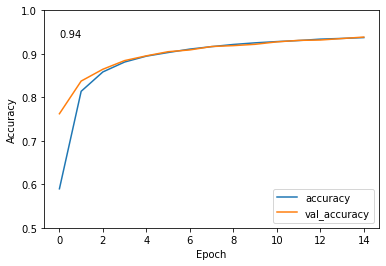

In [240]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.text(early_stopping.stopped_epoch, history.history['val_accuracy'][-1], str(round(history.history['val_accuracy'][-1],2)))
plt.show()

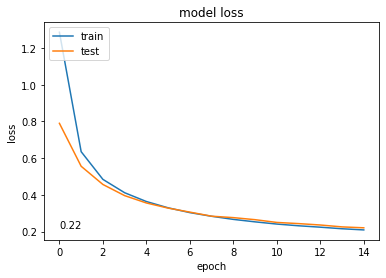

In [241]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(early_stopping.stopped_epoch, history.history['val_loss'][-1], str(round(history.history['val_loss'][-1],2)))
plt.show()

In [ ]:
# y_pred = model.predict(X_test)

# predictions = model.predict(X_test)
# pred = np.argmax(predictions, axis=1)
# print(pred)
# print(y_test)

# X_tes = [np.reshape(a/255, (28, 28)) for a in X_test.values]

# plt.figure(figsize=(5,1))
# for i in range(10):
#     plt.subplot(1,10,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_tes[i], cmap='gray')
#     plt.xlabel(str(f"{pred[i]}"))
# plt.show();

In [239]:
# load model 
import pickle
import streamlit as st
model.save("modelE.h5")